In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\datasets\nyc-property-sales.csv")

In [3]:
df.head()

BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
1        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
2        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT  BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0                   2A    392    6                                  C2   
1                    2    399   26                                  C7   
2                    2    399   39                                  C7   
3                   2B    402   21                                  C4   
4                   2A    404   55                                  C2   

                  ADDRESS APARTMENT NUMBER  ZIP CODE  RESIDENTIAL UNITS  \
0            153 AVENUE B                      10009                  5   
1   234 EAST 4TH   STREET                      10009                 28   
2   197 EAST 3RD   STREET                      10009                 16   
3     154 EAST 7TH STREET                      10009                 10   
4  301 EAST 10TH   STREET                      10009                  6   

   COMMERCIAL UNITS  TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET  \
0                 0            5             1633              6440   
1                 3           31             4616             18690   
2                 1           17             2212              7803   
3                 0           10             2272              6794   
4                 0            6             2369              4615   

   YEAR BUILT  TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  \
0        1900                          2                             C2   
1        1900                          2                             C7   
2        1900                          2                             C7   
3        1913                          2                             C4   
4        1900                          2                             C2   

  SALE PRICE        SALE DATE  
0    6625000   7/19/2017 0:00  
1        -    12/14/2016 0:00  
2        -     12/9/2016 0:00  
3    3936272   9/23/2016 0:00  
4    8000000  11/17/2016 0:00

In [4]:
#Data cleaning
print(df.shape)
print(df.isnull().sum(axis = 0))
print(df.dtypes)
print(df.describe())

df["SALE PRICE"] = df["SALE PRICE"].replace(' -  ', 0)
print(df["SALE PRICE"])

df["SALE PRICE"] = df["SALE PRICE"].astype(str).astype('int64')
print(df.dtypes)

#filter records that are less than 100 for SALE PRICE
df_filtered = df[df['SALE PRICE'] > 1000]
print(df_filtered.head(5))
print(df_filtered.shape)
print(df_filtered.columns)

#drop unwanted columns
cols = ['GROSS SQUARE FEET', 'LAND SQUARE FEET', 'BLOCK', 'LOT', 'EASE-MENT',	'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE']
df_filtered = df_filtered.drop(cols, axis=1)
print(df_filtered.columns)

#convert SALE DATE from object to datetime
df_filtered['SALE DATE'] = pd.to_datetime(df_filtered['SALE DATE'])
print(df_filtered.dtypes)

#Update SALE DATE column to display month
month_look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df_filtered['SALE DATE'] = df_filtered['SALE DATE'].dt.month
df_filtered['SALE DATE'] = df_filtered['SALE DATE'].apply(lambda x: month_look_up[x])

print(df_filtered.head(5))

#Check the categorical variables
print(df_filtered['NEIGHBORHOOD'].unique())
print(df_filtered['NEIGHBORHOOD'].unique().size)
print(df_filtered['BUILDING CLASS CATEGORY'].unique().size)
print(df_filtered['ZIP CODE'].unique().size)
print(df_filtered['TAX CLASS AT PRESENT'].unique().size)
print(df_filtered['TAX CLASS AT TIME OF SALE'].unique().size)

#Add dummy variables and drop BOROUGH column
df_borough = pd.get_dummies(df_filtered['BOROUGH'], prefix='BOROUGH')
df_filtered = pd.concat([df_filtered, df_borough], axis=1)
df_filtered = df_filtered.drop(['BOROUGH'], axis=1)

print(df_filtered.head(5))

(84548, 21)
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT           

BOROUGH                               int64
NEIGHBORHOOD                         object
BUILDING CLASS CATEGORY              object
TAX CLASS AT PRESENT                 object
ZIP CODE                              int64
RESIDENTIAL UNITS                     int64
COMMERCIAL UNITS                      int64
TOTAL UNITS                           int64
YEAR BUILT                            int64
TAX CLASS AT TIME OF SALE             int64
SALE PRICE                            int64
SALE DATE                    datetime64[ns]
dtype: object
   BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
9        1  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS              

  TAX CLASS A

In [5]:
df_filtered = df_filtered[df_filtered['YEAR BUILT'] > 1900]

In [6]:
df_filtered.head()

NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
3   ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6   ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
9   ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS              
11  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS              
13  ALPHABET CITY  09 COOPS - WALKUP APARTMENTS                  

   TAX CLASS AT PRESENT  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
3                    2B     10009                 10                 0   
6                    2B     10009                  8                 0   
9                     2     10009                 24                 0   
11                   2B     10009                 10                 0   
13                    2     10009                  0                 0   

    TOTAL UNITS  YEAR BUILT  TAX CLASS AT TIME OF SALE  SALE PRICE SALE DATE  \
3            10        1913                          2     3936272       Sep   
6             8        1920                          2     3192840       Sep   
9            24        1920                          2    16232000       Nov   
11           10        2009                          2    10350000       Oct   
13            0        1920                          2      499000       Mar   

    BOROUGH_1  BOROUGH_2  BOROUGH_3  BOROUGH_4  BOROUGH_5  
3           1          0          0          0          0  
6           1          0          0          0          0  
9           1          0          0          0          0  
11          1          0          0          0          0  
13          1          0          0          0          0

In [7]:
df_filtered.shape

(52263, 16)

In [8]:
#Add dummy variables and drop NEIGHBORHOOD column
df_neighborhood = pd.get_dummies(df_filtered['NEIGHBORHOOD'], prefix='NEIGHBORHOOD')
df_filtered = pd.concat([df_filtered, df_neighborhood], axis=1)
df_filtered = df_filtered.drop(['NEIGHBORHOOD'], axis=1)

#Add dummy variables and drop BUILDING CLASS CATEGORY column
df_buildingclasscategory = pd.get_dummies(df_filtered['BUILDING CLASS CATEGORY'], prefix='CLASS')
df_filtered = pd.concat([df_filtered, df_buildingclasscategory], axis=1)
df_filtered = df_filtered.drop(['BUILDING CLASS CATEGORY'], axis=1)

#Add dummy variables and drop ZIP CODE column
df_zipcode = pd.get_dummies(df_filtered['ZIP CODE'], prefix='ZIPCODE')
df_filtered = pd.concat([df_filtered, df_zipcode], axis=1)
df_filtered = df_filtered.drop(['ZIP CODE'], axis=1)

#Add dummy variables and drop TAX CLASS AT TIME OF SALE column
df_taxclass = pd.get_dummies(df_filtered['TAX CLASS AT TIME OF SALE'], prefix='TAXCLASS')
df_filtered = pd.concat([df_filtered, df_taxclass], axis=1)
df_filtered = df_filtered.drop(['TAX CLASS AT TIME OF SALE','TAX CLASS AT PRESENT'], axis=1)

#Add dummy variables and drop SALE DATE AT TIME OF SALE column
df_saledate = pd.get_dummies(df_filtered['SALE DATE'], prefix='SALEDATE')
df_filtered = pd.concat([df_filtered, df_saledate], axis=1)
df_filtered = df_filtered.drop(['SALE DATE'], axis=1)

print(df_filtered.head(5))

    RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  YEAR BUILT  SALE PRICE  \
3                  10                 0           10        1913     3936272   
6                   8                 0            8        1920     3192840   
9                  24                 0           24        1920    16232000   
11                 10                 0           10        2009    10350000   
13                  0                 0            0        1920      499000   

    BOROUGH_1  BOROUGH_2  BOROUGH_3  BOROUGH_4  BOROUGH_5  \
3           1          0          0          0          0   
6           1          0          0          0          0   
9           1          0          0          0          0   
11          1          0          0          0          0   
13          1          0          0          0          0   

    NEIGHBORHOOD_AIRPORT LA GUARDIA  NEIGHBORHOOD_ALPHABET CITY  \
3                                 0                           1   
6                 

In [9]:
df_filtered.dtypes

RESIDENTIAL UNITS                    int64
COMMERCIAL UNITS                     int64
TOTAL UNITS                          int64
YEAR BUILT                           int64
SALE PRICE                           int64
BOROUGH_1                            uint8
BOROUGH_2                            uint8
BOROUGH_3                            uint8
BOROUGH_4                            uint8
BOROUGH_5                            uint8
NEIGHBORHOOD_AIRPORT LA GUARDIA      uint8
NEIGHBORHOOD_ALPHABET CITY           uint8
NEIGHBORHOOD_ANNADALE                uint8
NEIGHBORHOOD_ARDEN HEIGHTS           uint8
NEIGHBORHOOD_ARROCHAR                uint8
NEIGHBORHOOD_ARROCHAR-SHORE ACRES    uint8
NEIGHBORHOOD_ARVERNE                 uint8
NEIGHBORHOOD_ASTORIA                 uint8
NEIGHBORHOOD_BATH BEACH              uint8
NEIGHBORHOOD_BATHGATE                uint8
NEIGHBORHOOD_BAY RIDGE               uint8
NEIGHBORHOOD_BAYCHESTER              uint8
NEIGHBORHOOD_BAYSIDE                 uint8
NEIGHBORHOO

In [10]:
df.corr()

BOROUGH     BLOCK       LOT  ZIP CODE  \
BOROUGH                    1.000000  0.417001 -0.277848  0.256564   
BLOCK                      0.417001  1.000000 -0.229118  0.234063   
LOT                       -0.277848 -0.229118  1.000000 -0.145802   
ZIP CODE                   0.256564  0.234063 -0.145802  1.000000   
RESIDENTIAL UNITS         -0.023229 -0.015628 -0.034303  0.005578   
COMMERCIAL UNITS          -0.005503 -0.003517 -0.010953  0.000726   
TOTAL UNITS               -0.023346 -0.015888 -0.033169  0.005415   
YEAR BUILT                 0.108303  0.071262 -0.289463  0.330708   
TAX CLASS AT TIME OF SALE -0.315163 -0.287300  0.296680 -0.142915   
SALE PRICE                -0.070856 -0.054573  0.010795 -0.029644   

                           RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
BOROUGH                            -0.023229         -0.005503    -0.023346   
BLOCK                              -0.015628         -0.003517    -0.015888   
LOT                                -0.034303         -0.010953    -0.033169   
ZIP CODE                            0.005578          0.000726     0.005415   
RESIDENTIAL UNITS                   1.000000          0.015653     0.888309   
COMMERCIAL UNITS                    0.015653          1.000000     0.472998   
TOTAL UNITS                         0.888309          0.472998     1.000000   
YEAR BUILT                          0.025380          0.006428     0.024568   
TAX CLASS AT TIME OF SALE          -0.001074          0.049586     0.026429   
SALE PRICE                          0.093894          0.043536     0.102689   

                           YEAR BUILT  TAX CLASS AT TIME OF SALE  SALE PRICE  
BOROUGH                      0.108303                  -0.315163   -0.070856  
BLOCK                        0.071262                  -0.287300   -0.054573  
LOT                         -0.289463                   0.296680    0.010795  
ZIP CODE                     0.330708                  -0.142915   -0.029644  
RESIDENTIAL UNITS            0.025380                  -0.001074    0.093894  
COMMERCIAL UNITS             0.006428                   0.049586    0.043536  
TOTAL UNITS                  0.024568                   0.026429    0.102689  
YEAR BUILT                   1.000000                  -0.187609   -0.001220  
TAX CLASS AT TIME OF SALE   -0.187609                   1.000000    0.076217  
SALE PRICE                  -0.001220                   0.076217    1.000000

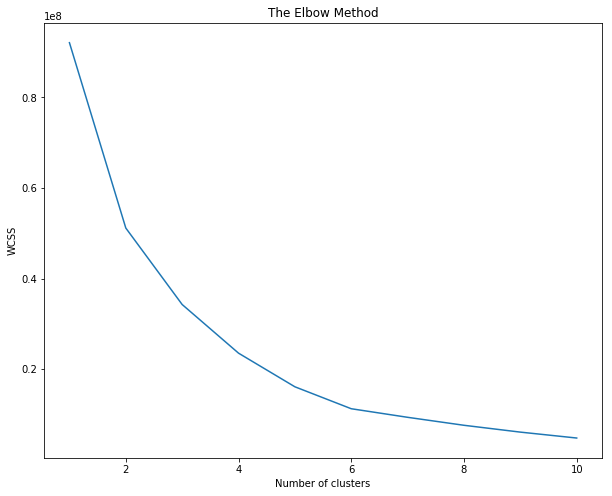

In [13]:
from sklearn.cluster import KMeans
plt.figure(figsize=(10, 8))
df_filtered_nosaleprice = df_filtered.drop(['SALE PRICE'], axis=1)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_filtered_nosaleprice)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
km = KMeans(n_clusters=4).fit(df_filtered_nosaleprice)
y_pred = km.predict(df_filtered_nosaleprice)
print(km.labels_)
df_filtered['kmeanClusters'] = y_pred

[1 1 1 ... 1 0 0]


In [15]:
df_filtered.tail(5)

RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  YEAR BUILT  \
84543                  2                 0            2        1998   
84544                  2                 0            2        1998   
84545                  2                 0            2        1925   
84546                  0                 7            7        2001   
84547                  0                 1            1        2006   

       SALE PRICE  BOROUGH_1  BOROUGH_2  BOROUGH_3  BOROUGH_4  BOROUGH_5  \
84543      450000          0          0          0          0          1   
84544      550000          0          0          0          0          1   
84545      460000          0          0          0          0          1   
84546    11693337          0          0          0          0          1   
84547       69300          0          0          0          0          1   

       NEIGHBORHOOD_AIRPORT LA GUARDIA  NEIGHBORHOOD_ALPHABET CITY  \
84543                                0                           0   
84544                                0                           0   
84545                                0                           0   
84546                                0                           0   
84547                                0                           0   

       NEIGHBORHOOD_ANNADALE  NEIGHBORHOOD_ARDEN HEIGHTS  \
84543                      0                           0   
84544                      0                           0   
84545                      0                           0   
84546                      0                           0   
84547                      0                           0   

       NEIGHBORHOOD_ARROCHAR  NEIGHBORHOOD_ARROCHAR-SHORE ACRES  \
84543                      0                                  0   
84544                      0                                  0   
84545                      0                                  0   
84546                      0                                  0   
84547                      0                                  0   

       NEIGHBORHOOD_ARVERNE  NEIGHBORHOOD_ASTORIA  NEIGHBORHOOD_BATH BEACH  \
84543                     0                     0                        0   
84544                     0                     0                        0   
84545                     0                     0                        0   
84546                     0                     0                        0   
84547                     0                     0                        0   

       NEIGHBORHOOD_BATHGATE  NEIGHBORHOOD_BAY RIDGE  NEIGHBORHOOD_BAYCHESTER  \
84543                      0                       0                        0   
84544                      0                       0                        0   
84545                      0                       0                        0   
84546                      0                       0                        0   
84547                      0                       0                        0   

       NEIGHBORHOOD_BAYSIDE  NEIGHBORHOOD_BEDFORD PARK/NORWOOD  \
84543                     0                                  0   
84544                     0                                  0   
84545                     0                                  0   
84546                     0                                  0   
84547                     0                                  0   

       NEIGHBORHOOD_BEDFORD STUYVESANT  NEIGHBORHOOD_BEECHHURST  \
84543                                0                        0   
84544                                0                        0   
84545                                0                        0   
84546                                0                        0   
84547                                0                        0   

       NEIGHBORHOOD_BELLE HARBOR  NEIGHBORHOOD_BELLEROSE  \
84543                          0                       0   
84544                          0                       0   
84

In [16]:
df_filtered['kmeanClusters'].value_counts()

1    21741
3    18330
0    12179
2       13
Name: kmeanClusters, dtype: int64

In [17]:
df_filtered.query('kmeanClusters==1')

RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  YEAR BUILT  \
3                     10                 0           10        1913   
6                      8                 0            8        1920   
9                     24                 0           24        1920   
13                     0                 0            0        1920   
15                     0                 0            0        1920   
16                     0                 0            0        1920   
17                     0                 0            0        1925   
18                     0                 0            0        1920   
19                     0                 0            0        1920   
21                     0                 0            0        1902   
22                    24                 0           24        1928   
23                     0                 0            0        1928   
24                     0                 0            0        1928   
25                     0                 0            0        1928   
26                     0                 0            0        1910   
27                     0                 0            0        1920   
29                     0                 0            0        1930   
32                     0                 0            0        1910   
33                     0                 0            0        1920   
34                     0                 0            0        1920   
35                     0                 0            0        1935   
37                     0                 0            0        1910   
38                     0                 0            0        1910   
39                     0                 0            0        1910   
42                     0                 0            0        1937   
43                     0                 0            0        1937   
44                     0                 0            0        1937   
45                     0                 0            0        1937   
46                     0                 0            0        1920   
47                     0                 0            0        1920   
...                  ...               ...          ...         ...   
84044                  1                 0            1        1930   
84058                  1                 0            1        1935   
84059                  1                 0            1        1920   
84069                  2                 0            2        1920   
84081                  2                 0            2        1915   
84082                  2                 0            2        1903   
84083                  2                 0            2        1915   
84086                  2                 0            2        1920   
84087                  2                 0            2        1901   
84088                  2                 0            2        1925   
84090                  2                 0            2        1925   
84091                  2                 0            2        1920   
84092                  2                 0            2        1920   
84093                  2                 0            2        1930   
84094                  2                 0            2        1920   
84095                  2                 0            2        1920   
84103                  2                 0            2        1925   
84110                  2                 0            2        1925   
84111                  2                 0            2        1925   
84112                  2                 0            2        1925   
84125                  2                 0            2        1920   
84171                  2                 2            4        1931   
84172                  1                 1            1        1920   
84206                  1                 0            1        1930   
84210                  1       

In [18]:
df_filtered.query('kmeanClusters==0')

RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  YEAR BUILT  \
11                    10                 0           10        2009   
73                    47                 0           47        2005   
75                   132                 0          132        1989   
95                     1                 0            1        2014   
100                    1                 0            1        2014   
104                    1                 0            1        2014   
112                    1                 0            1        2014   
116                    1                 0            1        2005   
122                    1                 0            1        2005   
129                    1                 0            1        2008   
133                    1                 0            1        2014   
134                    1                 0            1        2014   
135                    1                 0            1        2014   
136                    1                 0            1        2014   
137                    1                 0            1        2014   
138                    1                 0            1        2014   
139                    1                 0            1        2014   
140                    1                 0            1        2014   
141                    1                 0            1        2014   
142                    1                 0            1        2014   
143                    1                 0            1        2014   
144                    1                 0            1        2014   
145                    1                 0            1        2014   
147                    1                 0            1        2014   
148                    1                 0            1        2014   
149                    1                 0            1        2014   
150                    1                 0            1        2014   
151                    1                 0            1        2014   
152                    1                 0            1        2014   
153                    1                 0            1        2014   
...                  ...               ...          ...         ...   
84508                  2                 0            2        1987   
84510                  2                 0            2        1987   
84511                  2                 0            2        1987   
84512                  2                 0            2        1986   
84514                  2                 0            2        1984   
84516                  2                 0            2        1984   
84517                  2                 0            2        1984   
84518                  2                 0            2        1989   
84519                  2                 0            2        1985   
84520                  2                 0            2        2001   
84521                  2                 0            2        2001   
84522                  2                 0            2        2001   
84526                  2                 0            2        2010   
84527                  2                 0            2        2010   
84528                  2                 0            2        2004   
84529                  2                 0            2        2010   
84530                  2                 0            2        1998   
84531                  2                 0            2        1998   
84532                  2                 0            2        1998   
84533                  2                 0            2        1996   
84534                  2                 0            2        1996   
84535                  2                 0            2        1996   
84536                  2                 0            2        1996   
84537                  2                 0            2        1996   
84540                  2       

In [19]:
df_filtered.query('kmeanClusters==2')

RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  YEAR BUILT  \
2067                 529                 9          538        1929   
2090                 476                 6          482        1929   
5004                 771                 0          771        1959   
5005                 771                 0          771        1959   
5006                 771                 0          771        1959   
6332                 894                 8          902        1975   
19334                716                20          736        1927   
20902                498                22          520        1974   
23239                462                 0          462        1949   
24035                948                 7          955        1977   
61460               1844                22         1866        1972   
64831                  0              2261         2261        1920   
69397                446                 0          446        1960   

       SALE PRICE  BOROUGH_1  BOROUGH_2  BOROUGH_3  BOROUGH_4  BOROUGH_5  \
2067    212500000          1          0          0          0          0   
2090    239114603          1          0          0          0          0   
5004      5020000          1          0          0          0          0   
5005      5020000          1          0          0          0          0   
5006      5020000          1          0          0          0          0   
6332    620000000          1          0          0          0          0   
19334    51250000          0          1          0          0          0   
20902    78137536          0          1          0          0          0   
23239      150000          0          1          0          0          0   
24035    70936348          0          1          0          0          0   
61460      525000          0          0          0          1          0   
64831      315000          0          0          0          1          0   
69397      180000          0          0          0          1          0   

       NEIGHBORHOOD_AIRPORT LA GUARDIA  NEIGHBORHOOD_ALPHABET CITY  \
2067                                 0                           0   
2090                                 0                           0   
5004                                 0                           0   
5005                                 0                           0   
5006                                 0                           0   
6332                                 0                           0   
19334                                0                           0   
20902                                0                           0   
23239                                0                           0   
24035                                0                           0   
61460                                0                           0   
64831                                0                           0   
69397                                0                           0   

       NEIGHBORHOOD_ANNADALE  NEIGHBORHOOD_ARDEN HEIGHTS  \
2067                       0                           0   
2090                       0                           0   
5004                       0                           0   
5005                       0                           0   
5006                       0                           0   
6332                       0                           0   
19334                      0                           0   
20902                      0                           0   
23239                      0                           0   
24035                      0                           0   
61460                      0                           0   
64831                      0                           0   
69397                      0                           0   

       NEIGHBORHOOD_ARROCHAR  NEIGHBORHOOD_ARROCHAR-SHORE ACRES  \
2067                       0                              

In [20]:
df_filtered.query('kmeanClusters==3')

RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  YEAR BUILT  \
54                     0                 0            0        1950   
55                     0                 0            0        1950   
71                     0                 0            0        1940   
166                    1                 0            1        1965   
168                    1                 0            1        1965   
169                    1                 0            1        1965   
188                    0                 1            1        1951   
272                    0                 0            0        1940   
273                    0                 0            0        1940   
274                    0                 0            0        1940   
353                    0                 0            0        1963   
354                    0                 0            0        1963   
355                    0                 0            0        1963   
356                    0                 0            0        1963   
357                    0                 0            0        1963   
358                    0                 0            0        1963   
359                    0                 0            0        1963   
360                    0                 0            0        1963   
361                    0                 0            0        1963   
362                    0                 0            0        1963   
363                    0                 0            0        1963   
364                    0                 0            0        1963   
365                    0                 0            0        1963   
366                    0                 0            0        1960   
367                    0                 0            0        1960   
368                    0                 0            0        1960   
369                    0                 0            0        1960   
370                    0                 0            0        1960   
371                    0                 0            0        1960   
372                    0                 0            0        1960   
...                  ...               ...          ...         ...   
84309                  2                 0            2        1970   
84311                  2                 0            2        1970   
84312                  2                 0            2        1970   
84313                  2                 0            2        1970   
84314                  2                 0            2        1970   
84321                  2                 0            2        1970   
84324                  2                 0            2        1970   
84326                  2                 0            2        1975   
84327                  2                 0            2        1954   
84331                  2                 0            2        1970   
84333                  2                 0            2        1977   
84335                  2                 0            2        1970   
84337                  2                 0            2        1970   
84338                  2                 0            2        1970   
84341                  2                 0            2        1970   
84342                  2                 0            2        1970   
84343                  2                 0            2        1975   
84344                  2                 0            2        1975   
84347                  2                 0            2        1965   
84348                  2                 0            2        1965   
84350                  2                 0            2        1960   
84351                  2                 0            2        1970   
84352                  2                 0            2        1965   
84353                  2                 0            2        1960   
84354                  2       

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(df_filtered_nosaleprice, y_pred)
print(dict(zip(df_filtered_nosaleprice.columns, clf.feature_importances_)))

{'RESIDENTIAL UNITS': 0.001294782871827367, 'COMMERCIAL UNITS': 0.0, 'TOTAL UNITS': 0.0006688936468505141, 'YEAR BUILT': 0.9977746071282143, 'BOROUGH_1': 0.0, 'BOROUGH_2': 0.0, 'BOROUGH_3': 0.0, 'BOROUGH_4': 0.0, 'BOROUGH_5': 0.0, 'NEIGHBORHOOD_AIRPORT LA GUARDIA': 0.0, 'NEIGHBORHOOD_ALPHABET CITY': 0.0, 'NEIGHBORHOOD_ANNADALE': 0.0, 'NEIGHBORHOOD_ARDEN HEIGHTS': 0.0, 'NEIGHBORHOOD_ARROCHAR': 0.0, 'NEIGHBORHOOD_ARROCHAR-SHORE ACRES': 0.0, 'NEIGHBORHOOD_ARVERNE': 0.0, 'NEIGHBORHOOD_ASTORIA': 0.0, 'NEIGHBORHOOD_BATH BEACH': 0.0, 'NEIGHBORHOOD_BATHGATE': 0.0, 'NEIGHBORHOOD_BAY RIDGE': 0.0, 'NEIGHBORHOOD_BAYCHESTER': 0.0, 'NEIGHBORHOOD_BAYSIDE': 0.0, 'NEIGHBORHOOD_BEDFORD PARK/NORWOOD': 0.0, 'NEIGHBORHOOD_BEDFORD STUYVESANT': 0.0, 'NEIGHBORHOOD_BEECHHURST': 0.0, 'NEIGHBORHOOD_BELLE HARBOR': 0.0, 'NEIGHBORHOOD_BELLEROSE': 0.0, 'NEIGHBORHOOD_BELMONT': 0.0, 'NEIGHBORHOOD_BENSONHURST': 0.0, 'NEIGHBORHOOD_BERGEN BEACH': 0.0, 'NEIGHBORHOOD_BOERUM HILL': 0.0, 'NEIGHBORHOOD_BOROUGH PARK': 0.0, 'NE